<h1><center><font size="6">Classification</font></center></h1>



In your second homework you need to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
import pandas as pd
import numpy as np
import datetime
import sys
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

# <a id='3'>Data exploration</a>  

We check the shape of train and test dataframes and also show a selection of rows, to have an initial image of the data.



In [5]:
train_df.sample(5).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S


In [4]:
test_df.sample(5).head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,1231,3,"Betros, Master. Seman",male,NaN,0,0,2622,7.2292,NaN,C
144,1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.0,0,0,17475,26.5500,NaN,S
275,1167,2,"Bryhl, Miss. Dagmar Jenny Ingeborg",female,20.0,1,0,236853,26.0000,NaN,S
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
193,1085,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.3500,NaN,Q


In [3]:
print("Train: rows:{} cols:{}".format(train_df.shape[0], train_df.shape[1]))
print("Test:  rows:{} cols:{}".format(test_df.shape[0], test_df.shape[1]))

Train: rows:891 cols:12
Test:  rows:418 cols:11


Both **train** and **test** files contains the following values:  

* **PassengerID** - the index of the passenger (in the dataset);  
* **PClass** - the class of the passenger (from 1 to 3);
* **Name** - the name of the passenger;
* **Sex** - the sex of the passenger (female or male);  
* **Age** - the age (where available) of the passenger;  
* **SibSp** - the number of sibilings / spouses aboard of Titanic;  
* **Parch** - the number of parents / children aboard of Titanic;  
* **Ticket** - the ticket number;  
* **Fare** - the passenger fare (ticket cost);  
* **Cabin** - the cabin number;  
* **Embarked** - the place of embarcation of the passenger (C = Cherbourg, Q = Queenstown, S = Southampton).  

The **train** data has as well the target value, **Survived**.

It is important, before going to create a model, to have a good understanding of the data. We will therefore explore the various features.

Let's start by checking if there are missing data and unlabeled data.

Next, analyze the dependencies of the target variable on various features, such as Age, Sex, and so on, using approaches similar to those in the first homework.

Draw conclusions about what affects whether the passenger survives, check the distribution of features in the train and test data. 

In [4]:
train_df['train_test'] = 1
test_df['train_test'] = 0
test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

In [5]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


There are a total of 891 passengers in the training dataset. Most of the passengers were travelling in the third class.
Since the variable survived is dicrete the mean tells us that 38% people that survived.
The maximum fare was 512 however the fare prices varied as we can see that from the standard deviation.

In [15]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
#your code is here
train_df.info()

#missing data
print(train_df.isnull().sum()/ len(train_df) *100)
print()
print(test_df.isnull().sum()/ len(test_df) *100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ti

The Age and Embarked variables have some missing values so we may need to treat these variables.
But the cabin variable has 77% and 78% missing values in the training and testing dataset respectively. The best approach would be to drop the variables as 
imputing the missing values here will not be a good technique with such limited data.

In [8]:
var_num = train_df[['Age','SibSp','Parch','Fare']]
var_cat = train_df[['Pclass','Sex','Ticket','Cabin','Embarked']]

test_num = test_df[['Age','SibSp','Parch','Fare']]
test_cat = test_df[['Pclass','Sex','Ticket','Cabin','Embarked']]

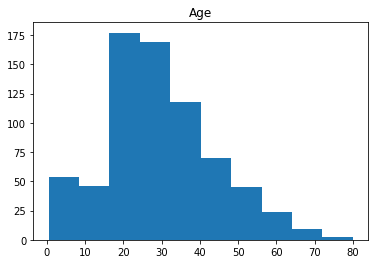

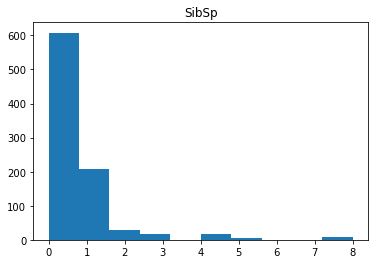

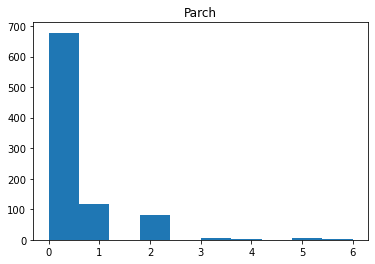

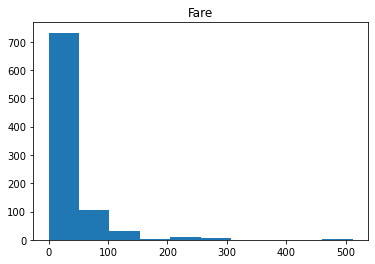

In [11]:
#Checking distribution for numerical variables in training dataset
for i in var_num.columns:
    plt.hist(var_num[i])
    plt.title(i)
    plt.show()

Age looks normalised but other variables do not seem to follow a normalised distribution and might require transformation later. We see similar distributions in
the testing dataset.

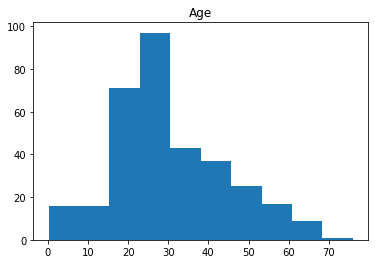

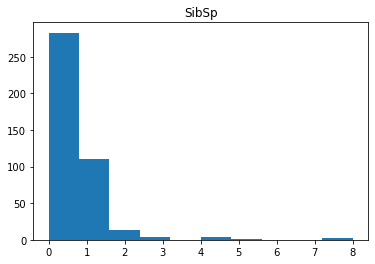

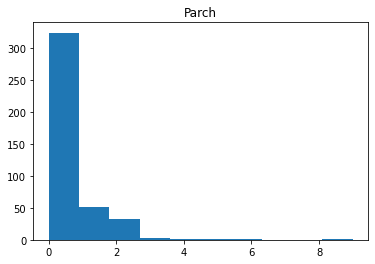

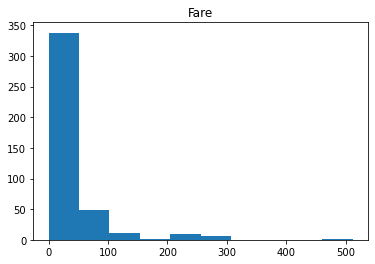

In [12]:
#Checking distribution for numerical variables in testing dataset
for i in test_num.columns:
    plt.hist(test_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

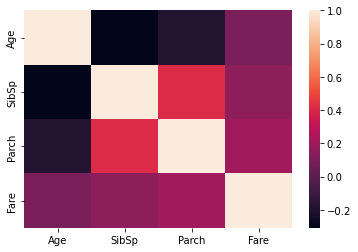

In [14]:
import seaborn as sns

#Correlation Map
sns.heatmap(var_num.corr())

Parch and SibSp have a higher correlation as parents are more likely to travel with their children and spouses tend to travel together.

In [35]:
print(pd.pivot_table(train_df, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()

print(pd.pivot_table(train_df, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()

print(pd.pivot_table(train_df, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [33]:
train_df.groupby('Sex',as_index=False).Survived.mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [36]:
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [37]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


- By Pclass: People sailing in first class had a higher survival rate than the Second or Third class. An important point here is that the total number of passengers
in the First class are lesser than the Third class and even then more first class passengers survived. We can assume 1st class consists of rich passengers. 
This could be an important feature for the model.

- By Sex: Most of the women survived, and the majority of the male died in the shipwreck. From total female passengars 74% females survived and 18% males.

- By Embarking point: This factor doesn’t seem very relevant, but based on percentages people embarking from Cherbourg (55%) have a higher survival rate.

*Example:*
From the total female passengers, *n*% survived.  
In the same time, from the total male passengers, only m% survived.

In [18]:
pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


 Young passengers have a higher survival rate. Average age of survivors is 28.
 Also the rich passengers, i.e., people who paid higher fares and travelled in first class had higher chances of surviving the shipwreck.

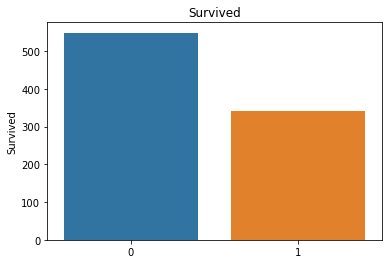

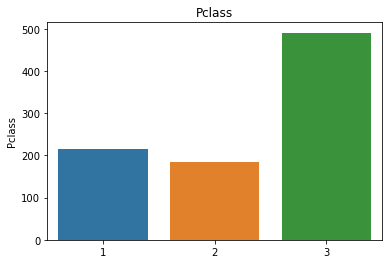

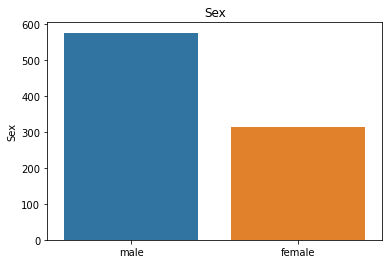

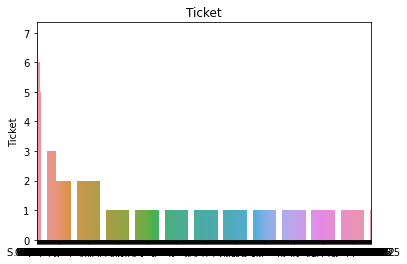

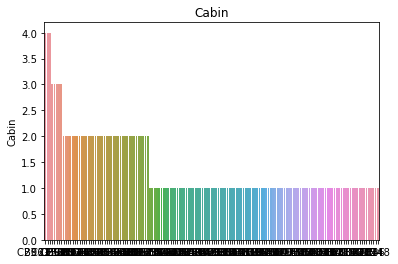

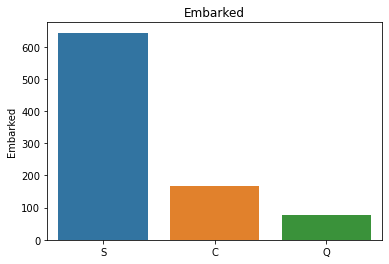

In [22]:
#Plotting for insights from categorical variables
for i in var_cat.columns:
    sns.barplot(x=var_cat[i].value_counts().index,y=var_cat[i].value_counts()).set_title(i)
    plt.show()

1. From the survived graph we can see only around 300 people survived. Majority of the people, mostly the Men did not survive.
2. Third class comprised of most of the passengers.
3. There were more number of men aboard, almost double the women (And that is why more higher number of deaths for the men).
4. Most of the passengers boarded the Titanic from Southampton.
5. The cabin and ticket number does not give us any information. As ticket number would be unique to each passenger and is an ID variable it would be dropped and as mentioned before due to missing values we would be dropping the cabin variable too. As they will not be in the model we will not be analysing them.

In [9]:
#variables to drop
drop_list=['Cabin','Ticket','PassengerId', 'Name', 'train_test']
train_df1 = train_df.drop(drop_list,axis=1)
test_df1 = test_df.drop(drop_list,axis=1)

Treating missing values - For age we will be imputing the data with the mean value as it's a numerical feature and also follows a normal distribution so the 
imputing missing values with average is a good method to use. 
For embark as most passengers embarked from Southampton we will be replacing missing values with 'S' (only missing in training). 
Fare is missing in testing dataset and from the distribution graph we can assume this data is likely to have outliers which can also be checked by plotting a 
box plot. So in this case instead of mean we will impute the missing values with median.

In [10]:
#Missing values treatment
train_df1.Embarked.fillna('S',inplace=True)

train_df1.Age.fillna(train_df1.Age.mean(), inplace=True)
test_df1.Age.fillna(test_df1.Age.mean(), inplace=True)

test_df1.Fare.fillna(test_df1.Fare.median(), inplace=True)

In [11]:
train_df2 = pd.get_dummies(train_df1,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df2 = pd.get_dummies(test_df1,columns=['Pclass','Sex','Embarked'],drop_first=True)
all_data1 = [train_df2,test_df2]
train_df2.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [12]:
#Creating flag variable if the passenger is a child let's say below 16
for dataset in all_data1:
    dataset["IsChild"] = np.where(dataset["Age"] < 16, 1, 0)

In [21]:
test_df2.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,IsChild
0,34.5,0,0,7.8292,NaN,0,1,1,1,0,0
1,47.0,1,0,7.0000,NaN,0,1,0,0,1,0
2,62.0,0,0,9.6875,NaN,1,0,1,1,0,0
3,27.0,0,0,8.6625,NaN,0,1,1,0,1,0
4,22.0,1,1,12.2875,NaN,0,1,0,0,1,0



## <a id='50'>Split the data</a>  

Let's split the training and validation set. We will use a 80-20 split. Don't forget to fix random_state. 


In [22]:
#your code is here

X = train_df2.drop("Survived",axis=1) 
Y = train_df2["Survived"]

#splitting our training data again in train and test data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2,random_state=40)


## <a id='51'>Build a model</a>  

We will start with a simple model (baseline), with just few predictors.

We start with two predictors, the `Sex` and `Pclass`. Create DesicionTreeClassifier and RandomForestClassifier, based on this features, without tuning parameters. 

Next, create two more complicated models: DesicionTreeClassifier and RandomForestClassifier with adding at least one feature that you found useful as a result of your analysis.

Find accuracy score for all models. Is it a good idea to use accuracy? Any suggestions about metrics? 

Then try to tune at least one parameter for every model using grid search and write down features and parameters, which gave you best score. 

In [23]:
#keeping only 2 variables Sex and Pclass

X_train1 = X_train.drop(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'IsChild'], axis = 1)
X_val1 = X_val.drop(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'IsChild'], axis = 1)
X_train1.head()

,Pclass_2,Pclass_3,Sex_male
661,0,1,1
393,0,0,0
266,0,1,1
144,1,0,1
446,1,0,0


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
#your code is here

classifier = DecisionTreeClassifier (max_depth = 3, random_state = 40)
classifier.fit(X_train1, Y_train)

random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train1, Y_train)

score_dt = round(classifier.score(X_train1, Y_train) * 100, 2)
score_rf = round(random_forest.score(X_train1, Y_train) * 100, 2)

score_dt_validation = round(classifier.score(X_val1, Y_val) * 100,2)
score_rf_validation = round(random_forest.score(X_val1, Y_val) * 100,2)

print(score_dt)
print(score_rf)
print(score_dt_validation)
print(score_rf_validation)

78.51
78.51
79.33
79.33


Based on previous analysis adding Age to the model would help as we clearly saw a higher survival rate in younger passengers.

In [26]:
#keeping 3 variables Age, Sex and Pclass

X_train2 = X_train.drop(['SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'IsChild'], axis = 1)
X_val2 = X_val.drop(['SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'IsChild'], axis = 1)
X_train2.head()

,Age,Pclass_2,Pclass_3,Sex_male
661,40.0,0,1,1
393,23.0,0,0,0
266,16.0,0,1,1
144,18.0,1,0,1
446,13.0,1,0,0


In [27]:
#Decision Tree
classifier = DecisionTreeClassifier (max_depth = 3, random_state = 40)
classifier.fit(X_train2, Y_train)
pred_val_dt = classifier.predict(X_val2)

#Random Forest
random_forest = RandomForestClassifier(n_estimators = 15)
random_forest.fit(X_train2, Y_train)
pred_val_rf = random_forest.predict(X_val2)

score_dt = round(classifier.score(X_train2, Y_train) * 100, 2)
score_rf = round(random_forest.score(X_train2, Y_train) * 100, 2)

score_dt_validation = round(accuracy_score(Y_val, pred_val_dt) * 100,2)
score_rf_validation = round(accuracy_score(Y_val, pred_val_rf) * 100,2)

print(score_dt)
print(score_rf)
print(score_dt_validation)
print(score_rf_validation)

81.04
87.78
81.01
84.36


We can see that adding age has increased the accuracy score of our model. Now we will add the remaining variables to our models and see the accuracy score 
along with other metrics.

In [28]:
#Decision Tree
classifier = DecisionTreeClassifier (max_depth = 5, random_state = 40)
classifier.fit(X_train, Y_train)
pred_val_dt = classifier.predict(X_val)

#Random Forest
random_forest = RandomForestClassifier(n_estimators = 15)
random_forest.fit(X_train, Y_train)
pred_val_rf = random_forest.predict(X_val)

score_dt = round(classifier.score(X_train, Y_train) * 100, 2)
score_rf = round(random_forest.score(X_train, Y_train) * 100, 2)

score_dt_validation = round(accuracy_score(Y_val, pred_val_dt) * 100,2)
score_rf_validation = round(accuracy_score(Y_val, pred_val_rf) * 100,2)

print('Accuracy Score for training (decision tree) : ' + str(score_dt))
print('Accuracy Score for training (random forest) : ' + str(score_rf))
print('Accuracy Score for validation (decision tree) : ' + str(score_dt_validation))
print('Accuracy Score for validation (random forest) : ' + str(score_rf_validation))

Accuracy Score for training (decision tree) : 85.25
Accuracy Score for training (random forest) : 96.91
Accuracy Score for validation (decision tree) : 81.56
Accuracy Score for validation (random forest) : 80.45


In [32]:
#Decision Tree
confusion_matrix(Y_val, pred_val_dt)

array([[89, 14],
       [19, 57]])

In [33]:
#Decision Tree
print(classification_report(Y_val, pred_val_dt))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.80      0.75      0.78        76

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



In [34]:
#Random Forest
confusion_matrix(Y_val, pred_val_rf)

array([[88, 15],
       [20, 56]])

In [35]:
#Random Forest
print(classification_report(Y_val, pred_val_rf))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       103
           1       0.79      0.74      0.76        76

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



Seeing the confusion matrix we can see the TP's are higher in decision tree. So the precision for decision tree is higher. 
We can also see the recall, f1 score and accuracy metrics for both model. They are very close in terms of performance.
So now let's look at the variable importance.

In [36]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.269
Age,0.253
Sex_male,0.242
Pclass_3,0.058
SibSp,0.053
Parch,0.040
Embarked_S,0.028
IsChild,0.026
Pclass_2,0.019


<AxesSubplot:xlabel='feature'>

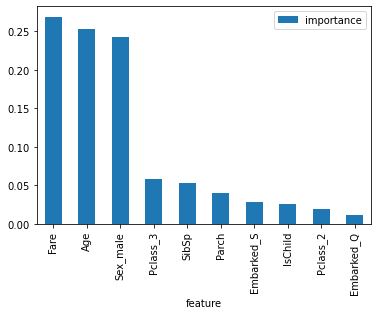

In [37]:
importances.plot.bar()

In [70]:
decisiontree = DecisionTreeClassifier(random_state = 40)
dep = np.arange(1,10)
param_grid = {'max_depth' : dep,
            'criterion' :['gini', 'entropy']}

dt_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

dt_cv.fit(X_train, Y_train)
print('Best value of max_depth:',dt_cv.best_params_)

Best value of max_depth: {'criterion': 'gini', 'max_depth': 3}


In [71]:
classifier_final = DecisionTreeClassifier (random_state = 40, max_depth = 3, criterion='gini')
classifier_final.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [72]:
print(classifier_final.score(X_train, Y_train))

0.8300561797752809


In [73]:
pred_dt = classifier_final.predict(X_val)

In [74]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(Y_val,pred_dt)))
print('Precision Score : ' + str(precision_score(Y_val,pred_dt)))
print('Recall Score : ' + str(recall_score(Y_val,pred_dt)))
print('F1 Score : ' + str(f1_score(Y_val,pred_dt)))

Accuracy Score : 0.8324022346368715
Precision Score : 0.8382352941176471
Recall Score : 0.75
F1 Score : 0.7916666666666666


The above metrics are for our final Decision Tree Model with fine tuned parameters on the testing dataset

In [75]:
random_grid=RandomForestClassifier(random_state=40)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_random = GridSearchCV(estimator=random_grid, param_grid=param_grid, cv= 5)
CV_random.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [76]:
print(CV_random.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}


In [77]:
rf_final=RandomForestClassifier(random_state=40, max_features='auto', n_estimators= 200, max_depth=7, criterion='entropy')

In [78]:
rf_final.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200,
                       random_state=40)

In [79]:
print(rf_final.score(X_train, Y_train))

0.8792134831460674


In [80]:
pred_rf = rf_final.predict(X_val)

In [81]:
print('Accuracy Score : ' + str(accuracy_score(Y_val,pred_rf)))
print('Precision Score : ' + str(precision_score(Y_val,pred_rf)))
print('Recall Score : ' + str(recall_score(Y_val,pred_rf)))
print('F1 Score : ' + str(f1_score(Y_val,pred_rf)))

Accuracy Score : 0.8379888268156425
Precision Score : 0.873015873015873
Recall Score : 0.7236842105263158
F1 Score : 0.7913669064748201


The metrics above are for the random forest model with fine tuned parameters on the testing dataset.
Both the models perform similarly on the testing dataset with minor differences, but we see a better accuracy score for Random forest model on our training dataset in 
comparision to the Decision Trees model.